<a href="https://colab.research.google.com/github/Sadman26/machine_learning/blob/new_one/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Importing</h1>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn
import sklearn.cluster as cluster

**<h1>Dataset Load</h1>**

In [2]:
dataset=pd.read_csv('drive/MyDrive/BUBT_Dataset/Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**<h1>Check Null</h1>**

In [3]:
dataset.isnull().values.any()

False

**<h1>Rename columns</h1>**

In [5]:
dataset.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)
dataset

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**<h1>Describe Dataset</h1>**

In [6]:
dataset.describe()

,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**<h1>Histogram</h1>**

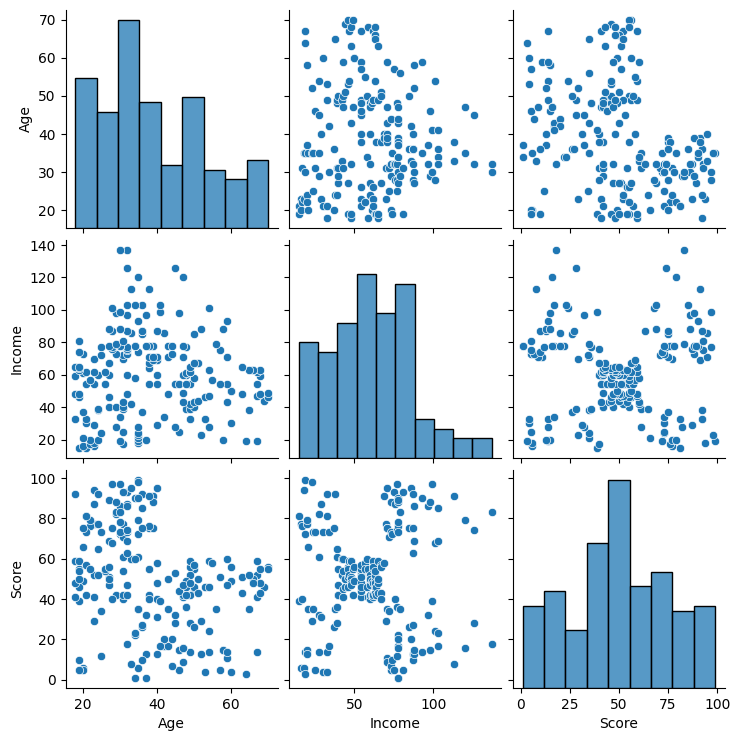

In [7]:
seaborn.pairplot(dataset[['Age','Income','Score']])

**<h1>K-Means for Income & Score</h1>**

In [8]:
kmeans= cluster.KMeans(n_clusters=5)
kmeans = kmeans.fit(dataset[['Score','Income']])
kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[79.36363636, 25.72727273],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [17.11428571, 88.2       ]])

**<h1>New Cluster Column</h1>**

In [9]:
dataset['Income_Cluster'] = kmeans.labels_
dataset

,CustomerID,Genre,Age,Income,Score,Income_Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4


**<h1>Count Elements</h1>**

In [10]:
dataset['Income_Cluster'].value_counts()

1    81
2    39
4    35
3    23
0    22
Name: Income_Cluster, dtype: int64

**<h1>Plotting</h1>**

<Axes: xlabel='Income', ylabel='Score'>

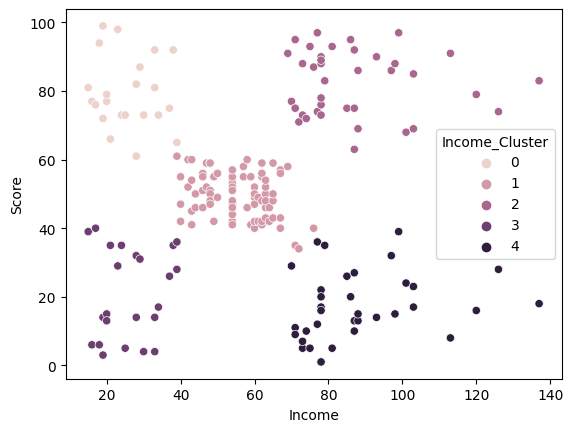

In [11]:
seaborn.scatterplot(x='Income',y='Score',hue='Income_Cluster',data=dataset)